# Import Libraries

In [1]:
import boto3, os
import botocore
import pandas as pd
import re

# Read in credentials file
This is a .txt file where I copy the access keys that are provided for me in the Account Details part of AWS classroom. This has not be included in our github repo in order to keep my keys private. The file is read in and the proper information is parsed out and used to connect to AWS Command Line Interface (CLI).


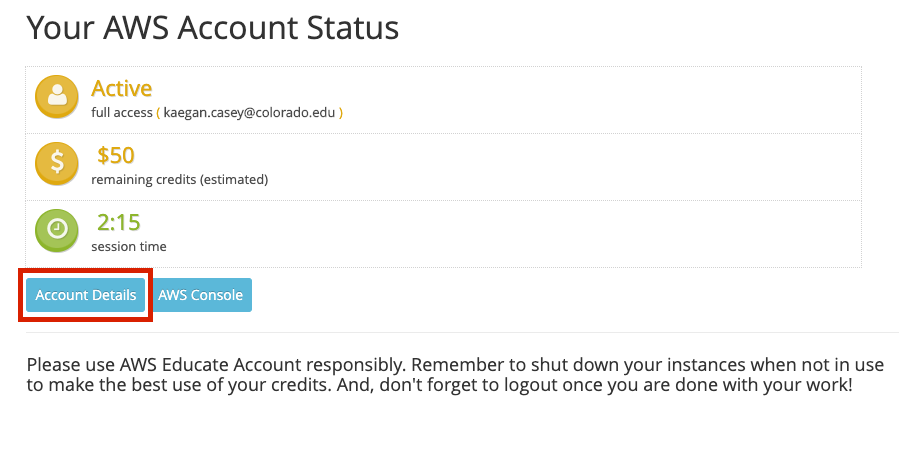

Read in .txt file

In [2]:
key_list = []

with open('/Users/kaegan/Documents/CU Boulder/2Masters/3Spring Semester/3Unstruct Dist Data/aws_credentials/credentials.txt', 'r') as file:
    for line in file:
        key_list.append(line.strip("\n"))

Parse relevant info

In [3]:
access_key_id = re.search('.*=(.*)', key_list[1]).group(1)
secret_access_key = re.search('.*=(.*)', key_list[2]).group(1)
session_token = re.search('.*=(.*=)', key_list[3]).group(1)

# Initialize boto3 client and resource with proper credentials

In [4]:
s3 = boto3.client('s3',
                aws_access_key_id=access_key_id,
                aws_secret_access_key=secret_access_key,
                aws_session_token=session_token,)
s3_resource = boto3.resource('s3',
                aws_access_key_id=access_key_id,
                aws_secret_access_key=secret_access_key,
                aws_session_token=session_token,)

# Create our S3 Bucket
This has been commented out because it only needed to be done once and will throw an error because all S3 buckets must have a unique name even accross users.

In [5]:
# def create_bucket(bucket):
#     import logging

#     try:
#         s3.create_bucket(Bucket=bucket)
#     except botocore.exceptions.ClientError as e:
#         logging.error(e)
#         return 'Bucket ' + bucket + ' could not be created.'
#     return 'Created or already exists ' + bucket + ' bucket.'

In [6]:
# create_bucket('la-plata-peak')

Check that Bucket was Created

In [7]:
response = s3.list_buckets()
response['Buckets']

[{'Name': 'la-plata-peak',
  'CreationDate': datetime.datetime(2020, 4, 14, 18, 37, 13, tzinfo=tzutc())}]

# List Bucket Contents (files)

In [8]:
def list_bucket_contents(bucket, match='', size_mb=0):
    bucket_resource = s3_resource.Bucket(bucket)
    total_size_gb = 0
    total_files = 0
    match_size_gb = 0
    match_files = 0
    for key in bucket_resource.objects.all():
        key_size_mb = key.size/1024/1024
        total_size_gb += key_size_mb
        total_files += 1
        list_check = False
        if not match:
            list_check = True
        elif match in key.key:
            list_check = True
        if list_check and not size_mb:
            match_files += 1
            match_size_gb += key_size_mb
            print(f'{key.key} ({key_size_mb:3.0f}MB)')
        elif list_check and key_size_mb <= size_mb:
            match_files += 1
            match_size_gb += key_size_mb
            print(f'{key.key} ({key_size_mb:3.0f}MB)')

    if match:
        print(f'Matched file size is {match_size_gb/1024:3.1f}GB with {match_files} files')            
    
    print(f'Bucket {bucket} total size is {total_size_gb/1024:3.1f}GB with {total_files} files')

In [9]:
list_bucket_contents(bucket='nyc-tlc', match='2019')

trip data/fhv_tripdata_2019-01.csv (1242MB)
trip data/fhv_tripdata_2019-02.csv ( 93MB)
trip data/fhv_tripdata_2019-03.csv ( 72MB)
trip data/fhv_tripdata_2019-04.csv (104MB)
trip data/fhv_tripdata_2019-05.csv (111MB)
trip data/fhv_tripdata_2019-06.csv (107MB)
trip data/fhv_tripdata_2019-07.csv (103MB)
trip data/fhv_tripdata_2019-08.csv ( 99MB)
trip data/fhv_tripdata_2019-09.csv ( 56MB)
trip data/fhv_tripdata_2019-10.csv ( 98MB)
trip data/fhv_tripdata_2019-11.csv ( 88MB)
trip data/fhv_tripdata_2019-12.csv ( 95MB)
trip data/fhvhv_tripdata_2019-02.csv (1221MB)
trip data/fhvhv_tripdata_2019-03.csv (1444MB)
trip data/fhvhv_tripdata_2019-04.csv (1315MB)
trip data/fhvhv_tripdata_2019-05.csv (1351MB)
trip data/fhvhv_tripdata_2019-06.csv (1270MB)
trip data/fhvhv_tripdata_2019-07.csv (1228MB)
trip data/fhvhv_tripdata_2019-08.csv (1217MB)
trip data/fhvhv_tripdata_2019-09.csv (1214MB)
trip data/fhvhv_tripdata_2019-10.csv (1280MB)
trip data/fhvhv_tripdata_2019-11.csv (1308MB)
trip data/fhvhv_tripdat